<a href="https://colab.research.google.com/github/dougfletcher10/W207/blob/master/Week_9_K_means_clustering_and_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## K-Means Clustering -- Exploration
We are going back to our old friend, the iris data set.

The main idea is: we start with $K$ random seeds ($centers$) and measure the $distance$ to each of the points, after which we move the center into the mean and reevaluate the distances. Naturally, we need to define a distance function. A list of distance functions that scikit-learn's implementation of KMeans supports is here: http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cdist.html. You can also define your own distance functions.

Here is a demo of k-means clustering algorithm for 2D clusters: http://shabal.in/visuals/kmeans/1.html

And here is an example of implementation in Python: https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

With K-means, a lot depends on where clustering starts. Solutions:

* cross-validation by mini-batching
* choosing multiple random cluster starting points
* kmeans++
* ... 

(A video explaning how kmeans++ works can be found here: https://www.youtube.com/watch?v=BIQDlmZDuf8.
)

If we look at finding the optimal number of clusters as a likelihood-maximization probem, we can use Information Criteria (BIC and / or AIC) to estimate when we can stop increasing the number: if we are not adding new information by adding one more cluster, we are done.

This worksheet is focused on the K-means method.

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


Load the data set. Clustering belongs to unsupervised learning; so we are not going to need the labels ($iris.target$ is irrelevant; working only with $iris.data$), and we are not breaking the data into training and test sets.

In [ ]:
# Load the data, which is included in sklearn.
iris = load_iris()
print ('Iris feature names:', iris.feature_names)
X, Names = iris.data, iris.feature_names
print (X.shape)

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)



Let's explore each feature, to see if any grouping exists naturally in each of them. We'll plot histograms, because boxplots are not sensitive to such groupings.

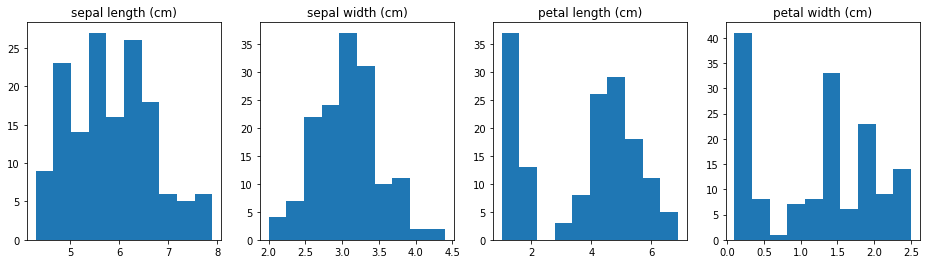

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))

for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii])
    ax.set_title(Names[ii])

plt.show()


Doesn't seem like much clustering going on there; let's use smaller bins:

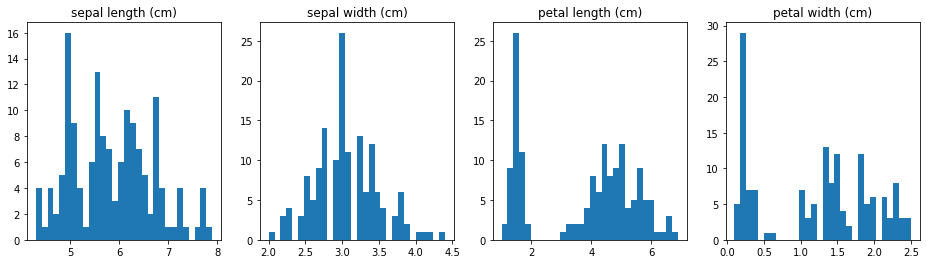

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
    ax.set_title(Names[ii])

plt.show()

Much better!  Now we see more gaps between data distributions.  

As a side note, we could have used $bins = 50$, but that would only leave 3 points per bin - not enough for meaningful histograms.  The Freedman-Diaconis rule for computing the number of mins for a histogram is known to be very robust and work well in practice. The bin-width is set to $h=2∗IQR∗n^{(-1/3)} $. That makes the number of bins $(max-min)/h$.

We want a method to separate all data into normally-distributed groupings, fitting data points into K bell curves

In [ ]:
##  Let's see if we can apply the KMeans from scikit-learn to our data
km = KMeans (n_clusters=1, init='k-means++')
clstrs = km.fit (X)
print (clstrs.cluster_centers_.shape)
print (clstrs.cluster_centers_)

(1, 4)
[[5.84333333 3.05733333 3.758      1.19933333]]




This is a matrix, with coluns corresponding to each of the features and rows to each of the cluster centers. Let's try a different number of centers:

In [ ]:
km = KMeans (n_clusters=2, init='k-means++')
clstrs2 = km.fit (X)
print (clstrs2.cluster_centers_.shape)
print (clstrs2.cluster_centers_)

(2, 4)
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]


In [ ]:
km = KMeans (n_clusters=5, init='k-means++')
clstrs5 = km.fit (X)
print (clstrs5.cluster_centers_.shape)
print (clstrs5.cluster_centers_)

(5, 4)
[[5.006      3.428      1.462      0.246     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.508      2.6        3.908      1.204     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [7.475      3.125      6.3        2.05      ]]


Let's show the histograms of each of the features with the cluster centers at n_clusters = 3:

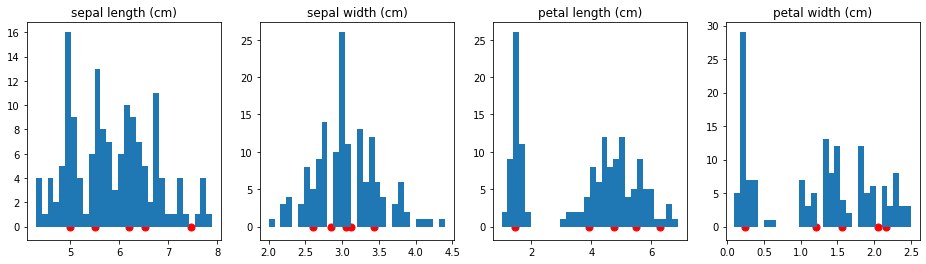

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
    ax.scatter (x = clstrs5.cluster_centers_[:,ii], y = np.zeros(5), c = 'red', s = 50)
    ax.set_title(Names[ii])

plt.show()

Here the big red circles correspond to cluster centers. We see that sepal length and petal length may be viewed as having 5 clusters (though most likely sepal length is really only 4), but sepal width is most likely one big cluster, and petal width really only has 4 clusters.

Let's wrap it into a function and check the histograms for several cluster counts

Number of Clusters: 1


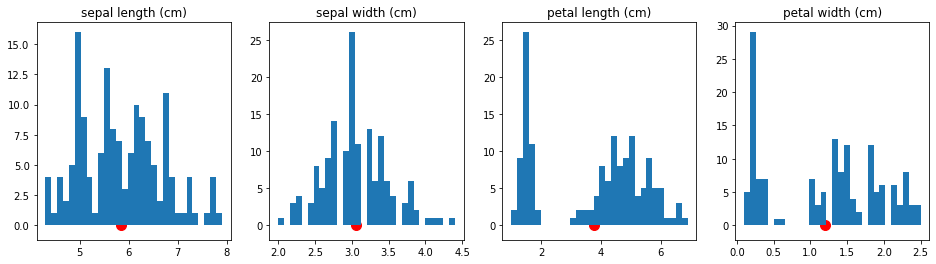

[[5.84333333 3.05733333 3.758      1.19933333]]
Number of Clusters: 2


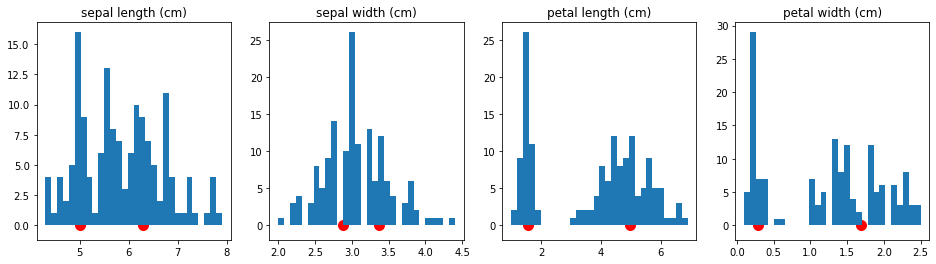

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]
Number of Clusters: 3


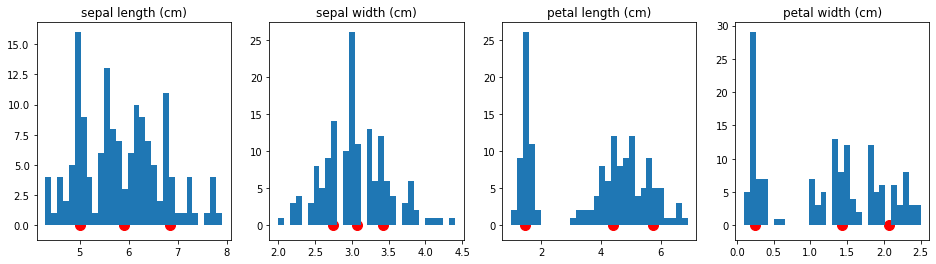

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Number of Clusters: 5


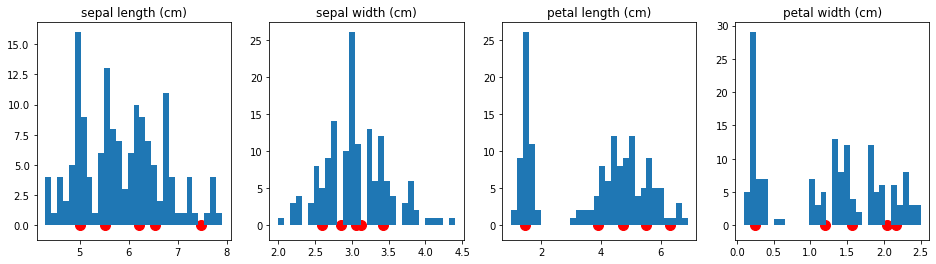

[[5.006      3.428      1.462      0.246     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [5.508      2.6        3.908      1.204     ]
 [7.475      3.125      6.3        2.05      ]]


In [ ]:
def ApplyKMeans (N, X = X, show_hist_and_centers = True):
    
    print ("Number of Clusters: %d" % (N))
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (X)
    
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
    for ii in np.arange (0, X.shape[1]):
        ax = axes[ii]
        ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
        ax.scatter (x = clstrs.cluster_centers_[:,ii], y = np.zeros(N), c = 'red', s = 100)
        ax.set_title(Names[ii])

    plt.show()

    print (clstrs.cluster_centers_)

    return clstrs

#for nn in [1,2,3,4,5,6,7,8,9,10]:
for nn in [1,2, 3, 5]:
    clstrs = ApplyKMeans(nn)
    

We see that $ < 3$ clusters is too few, and $>= 5$ is too many. How can we decide what is the good number of clusters?

**One way to do that is to count the local maxima in the density plot.  A density plot is basically a continuous line conecting the peaks of the histogram bars.**

In python, plotting a density line is not as obvious as in R, but can be done.

More details here: http://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib
"gaussian_kde uses a changable function, covariance_factor to calculate it's bandwidth. Before changing the function, the value returned by covariance_factor for this data was about .5. Lowering this lowered the bandwidth. I had to call _compute_covariance after changing that function so that all of the factors would be calculated correctly. It isn't an exact correspondence with the bw parameter from R, but hopefully it helps you get in the right direction."

For more details on Gaussian KDE (kernel density estimator), see, e.g., here: https://en.wikipedia.org/wiki/Kernel_density_estimation and for its python implementation, here: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.gaussian_kde.html

In [ ]:
from scipy.stats import gaussian_kde
def DrawDensityPlot(myVector, Name, ax, covar_factor = 0.1):
    data = myVector
    density = gaussian_kde(data)
    minData = min(data)
    maxData = max (data)
    sizeOfData = len(data)
    xs = np.linspace(minData,maxData,sizeOfData)
    density.covariance_factor = lambda : covar_factor
    density._compute_covariance()
    ax.plot(xs,density(xs))
    ax.set_title(Name)
    return ax

Number of Clusters: 2


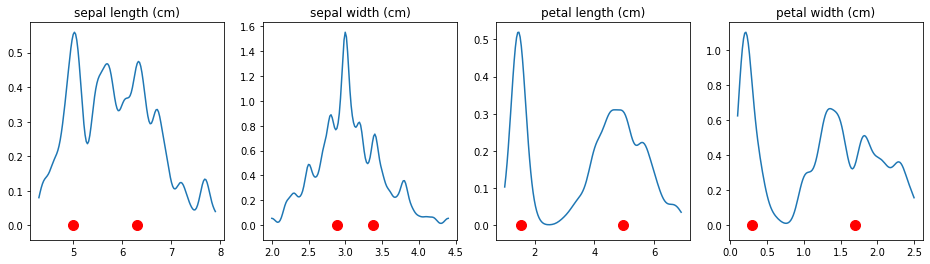

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]
Number of Clusters: 3


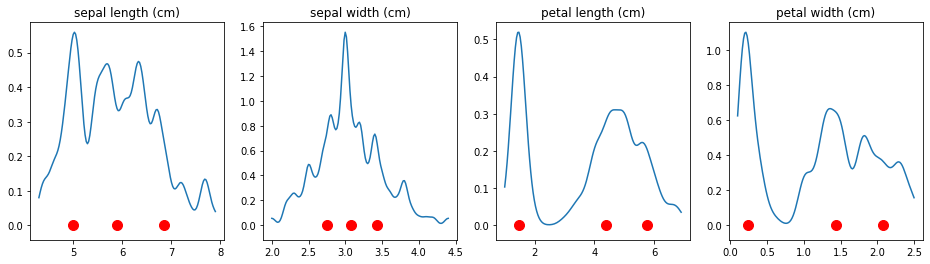

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Number of Clusters: 4


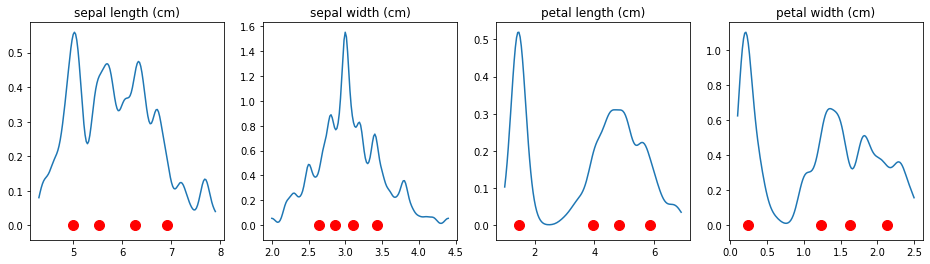

[[6.9125     3.1        5.846875   2.13125   ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [6.2525     2.855      4.815      1.625     ]]
Number of Clusters: 5


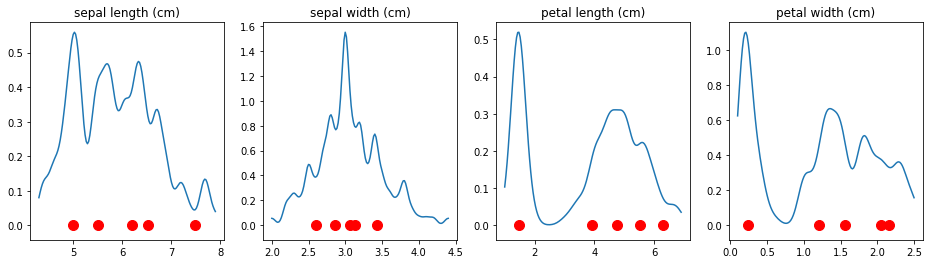

[[6.20769231 2.85384615 4.74615385 1.56410256]
 [5.006      3.428      1.462      0.246     ]
 [7.475      3.125      6.3        2.05      ]
 [5.508      2.6        3.908      1.204     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]]


In [ ]:
##  Use the ShowDensityPlot function:

def ApplyKMeansShowDensity (N, X = X, show_hist_and_centers = True, kde_covar_factor = 0.1):
    
    print ("Number of Clusters: %d" % (N))
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (X)
    
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
    for ii in np.arange (0, X.shape[1]):
        ax = axes[ii]
        ax = DrawDensityPlot(myVector = X[:,ii], Name = Names[ii], ax = ax, covar_factor = kde_covar_factor)
        ax.scatter (x = clstrs.cluster_centers_[:,ii], y = np.zeros(N), c = 'red', s = 100)

    plt.show()

    print (clstrs.cluster_centers_)

    return clstrs

#for nn in [1,2,3,4,5,6,7,8,9,10]:
for nn in [2,3,4,5]:  ##  Single cluster is an exercise in futility, and we already know that >=5 clusters is already too many
    clstrs = ApplyKMeansShowDensity(nn, kde_covar_factor =0.1125)

In other words, if we have a way to get the number of local maxima of the PDF (probability density function), then we have a way to tell KMeans how many clusters to look for in the data.

If we already know the local PDF maxima, why use KMeans at all?  We can slide down the peaks of the PDFs until we reach the corresponding local minima (**"cluster expansion process"**).  This is known as the **Model-Based Clustering** method.  It is very powerful; if we assume clusters to be hyperspherical, guesswork is eliminated. It also goes over multiple cluster shapes and optimizes the ***BIC*** by varying the shape and the number of clusters.  Its only downside is its low computational efficiency compared with KMeans and hierarchical clustering.  We will cover it later.  Here is a paper outlining the method:  http://www.jstatsoft.org/v18/i06/paper.  An implementation exists in python's ***sklearn.mixture*** library.  A better version is implemented in **R** (package ***mclust***).  You can invoke any R code from python directly by using the ***rpy2*** library.  

Back to our data.  There are a number of methods to figure out the number of clusters that "makes sense".  See, e.g., here: https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set.  

If we look at finding the optimal number of clusters as a likelihood-maximization probem, we can use **Information Criteria (*BIC* and *AIC*)** to estimate when we can stop increasing the number: if we are not adding new information by adding one more cluster, we are done.  This method is also known as ***X-means***. The paper introducing it is here:  http://www.cs.cmu.edu/~dpelleg/download/xmeans.pdf

We take advantage of the fact that k-means is asymptotically Gaussian: for a Gaussian distribution, $likelihood = \prod_k (centeredSumOfSquares_w * centeredSumOfSquares_b)$, where $centeredSumOfSquares_w$ is sum of squares of distances from the points to the centers of the clusters, and $centeredSumOfSquares_w$ is the sum of pairwise squares of distances between the centers of the clusters.  In K-means, distances to centers are represented by the inertia_ attribute.  Distances between cluster centers can be computed directly, e.g., as described here: https://machinelearning1.wordpress.com/2013/04/10/calculating-spatial-distance-metric-in-python/.

In [ ]:
from scipy.spatial import distance

def computeBIC (clstrs, X):
    n = X.shape[1]
    m = X.shape[0]
    k = len(clstrs.cluster_centers_)
    Dw = np.power(clstrs.inertia_, 2)
    Db = 0
    for cc0 in range (k):
        for cc1 in range (k):
            if not cc0 == cc1:
                Db = Db + distance.euclidean (clstrs.cluster_centers_[cc0], clstrs.cluster_centers_[cc1])
    ##print "Dw = %.3f; Db = %.3f" %(Dw,Db)
    D = np.sqrt (Dw + np.power(Db, 2))
    BIC = D + np.log(n)*m*k
    AIC = D + 2*m*k    
    return BIC, AIC

    
    
for ff in np.arange (X.shape[1]):

    myX = X[:,ff].reshape (len (X[:,ff]), 1)
    print ("Feature: %s" % (Names[ff]))
    # print myX.shape
    
    for nn in range (1,6):
        km = KMeans (n_clusters=nn, init='k-means++')
        clstrs = km.fit (myX)
        bic, aic = computeBIC(clstrs, myX)
        print ("Feature: %s. Number of clusters = %d.  BIC = %.3f. AIC = %.3f" % (Names[ff], nn, bic, aic))



Feature: sepal length (cm)
Feature: sepal length (cm). Number of clusters = 1.  BIC = 102.168. AIC = 402.168
Feature: sepal length (cm). Number of clusters = 2.  BIC = 31.039. AIC = 631.039
Feature: sepal length (cm). Number of clusters = 3.  BIC = 17.782. AIC = 917.782
Feature: sepal length (cm). Number of clusters = 4.  BIC = 18.797. AIC = 1218.797
Feature: sepal length (cm). Number of clusters = 5.  BIC = 26.219. AIC = 1526.219
Feature: sepal width (cm)
Feature: sepal width (cm). Number of clusters = 1.  BIC = 28.307. AIC = 328.307
Feature: sepal width (cm). Number of clusters = 2.  BIC = 11.181. AIC = 611.181
Feature: sepal width (cm). Number of clusters = 3.  BIC = 6.971. AIC = 906.971
Feature: sepal width (cm). Number of clusters = 4.  BIC = 9.295. AIC = 1209.295
Feature: sepal width (cm). Number of clusters = 5.  BIC = 14.934. AIC = 1514.934
Feature: petal length (cm)
Feature: petal length (cm). Number of clusters = 1.  BIC = 464.325. AIC = 764.325
Feature: petal length (cm). Nu

We see that AIC is more conservative:

    Sepal Length:  BIC: 3  AIC: 1
    Sepal Width:   BIC: 3  AIC: 1
    Petal Length:  BIC: 3  AIC: 2
    Petal Width:   BIC: 3  AIC: 1
    
We also know that there are 3 classes (labels) in the iris the data set, and BIC has returned 3 clusters for each feature. It makes sense to use BIC, rather than AIC, for getting the optimal number of clusters.
    
    
Reproduce the histograms here again:

Number of Clusters: 1


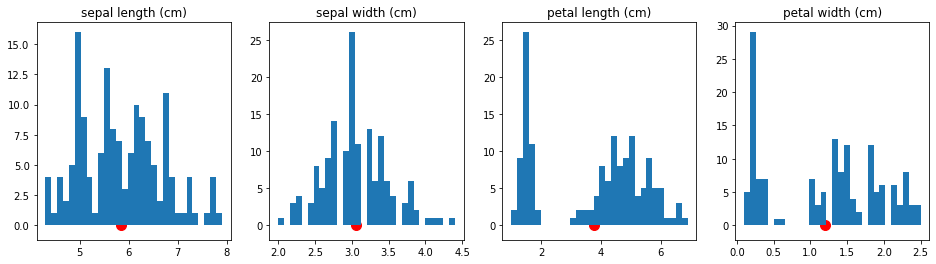

[[5.84333333 3.05733333 3.758      1.19933333]]
Number of Clusters: 2


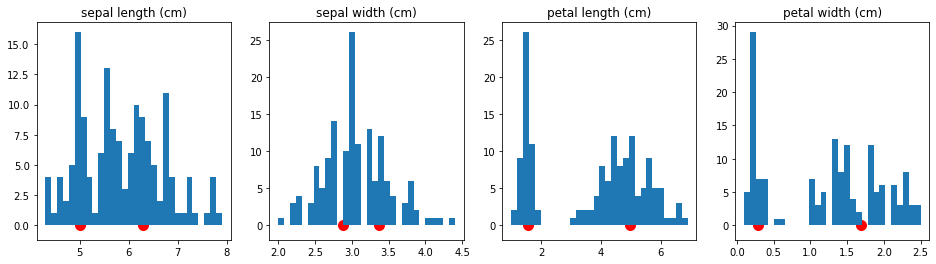

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]
Number of Clusters: 3


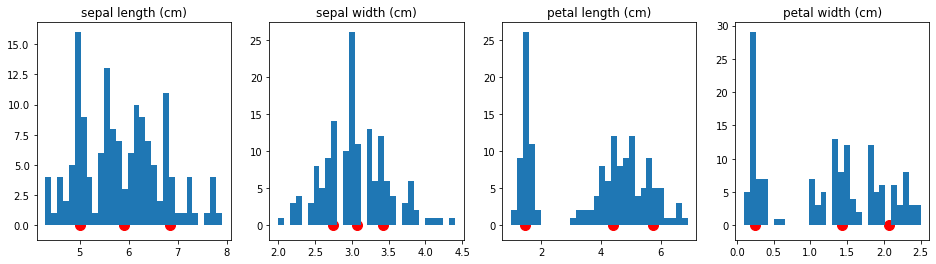

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Number of Clusters: 4


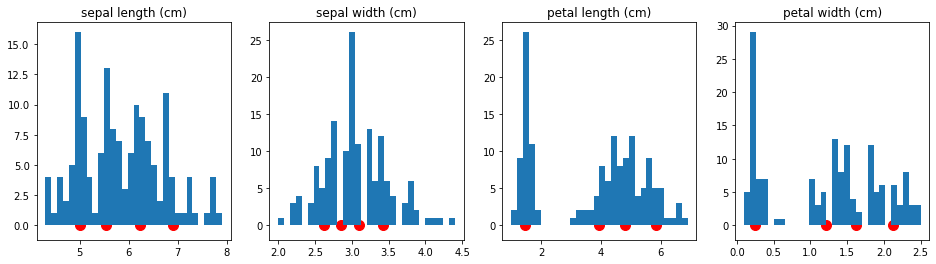

[[5.52962963 2.62222222 3.94074074 1.21851852]
 [5.006      3.428      1.462      0.246     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [6.23658537 2.85853659 4.80731707 1.62195122]]
Number of Clusters: 5


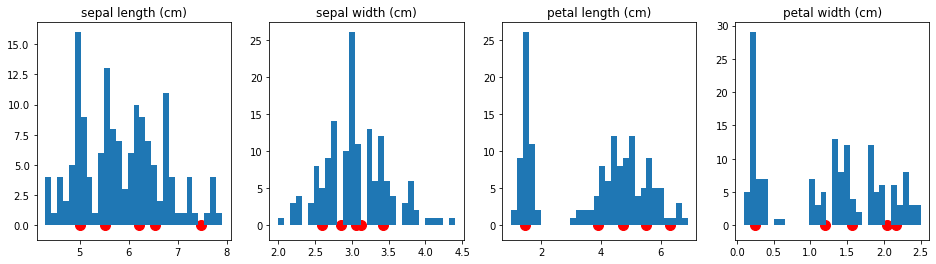

[[6.20769231 2.85384615 4.74615385 1.56410256]
 [5.006      3.428      1.462      0.246     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.508      2.6        3.908      1.204     ]
 [7.475      3.125      6.3        2.05      ]]


In [ ]:
for nn in [1,2,3,4,5]:
    clstrs = ApplyKMeans(nn)

We see that, while AIC is good at detecting true positives (Petal Length), it rejected too many false negatives (all other features of X).  On the other hand, BIC has separated the data into 3 clusters by each of the 4 features. 

Now let's look at some 2D combinations of features, just to help us visualize the data.  It is easy enough to generalize to any number of features.

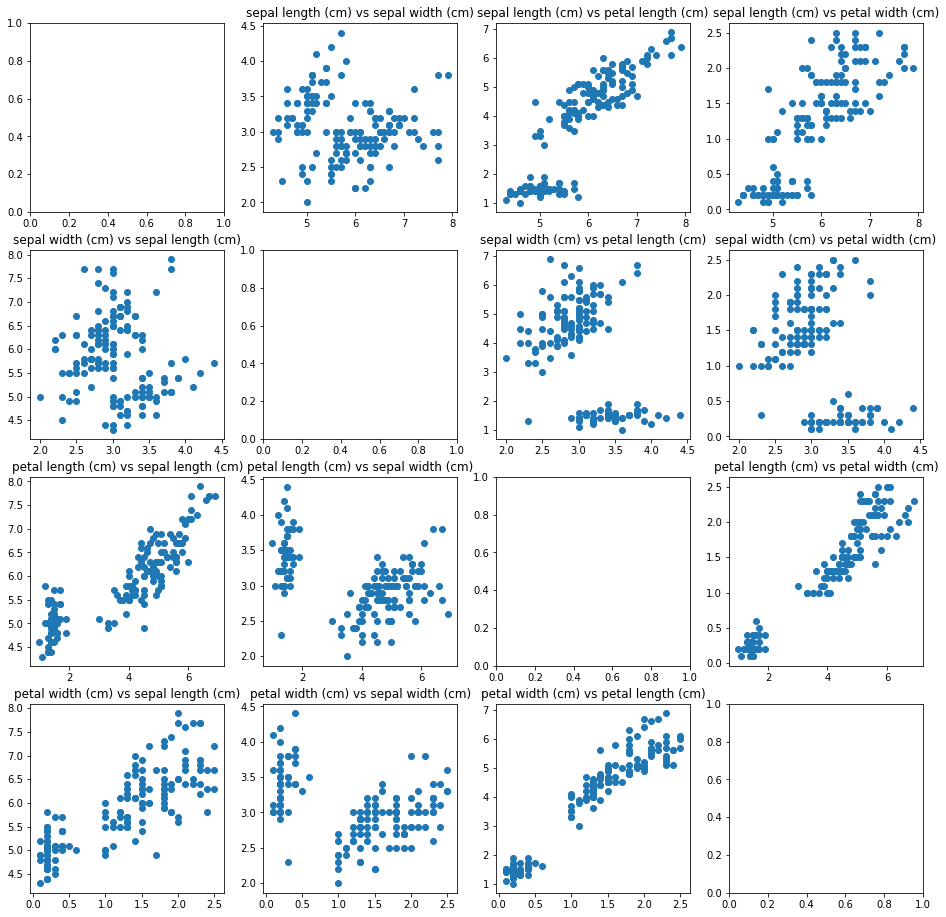

In [ ]:
fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))


for f1 in np.arange (X.shape[1]):
    for f2 in np.arange (X.shape[1]):
       if not f1 == f2:
            ax = axes[f1, f2]
            ax.scatter (X[:,f1], X[:,f2])
            ax.set_title (Names[f1] + " vs " + Names[f2])
            
plt.show()

(1, 2)
[[5.84333333 3.05733333]]
BIC = 430.475
['r']


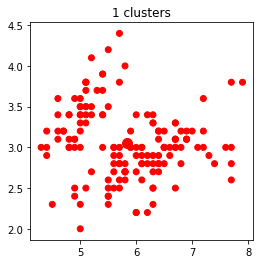

(2, 2)
[[6.61044776 2.96567164]
 [5.22409639 3.1313253 ]]
BIC = 658.271
['r' 'g']


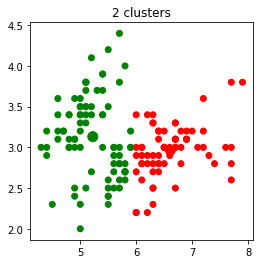

(3, 2)
[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.428     ]]
BIC = 937.909
['r' 'g' 'b']


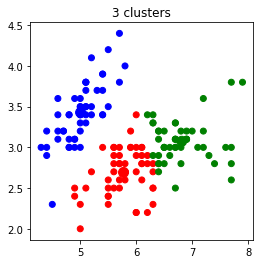

(4, 2)
[[6.85348837 3.1       ]
 [5.90980392 2.73529412]
 [5.21333333 3.65333333]
 [4.76923077 2.93076923]]
BIC = 1232.265
['r' 'g' 'b' 'm']


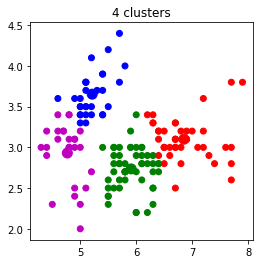

(5, 2)
[[6.54615385 3.04615385]
 [5.1875     3.6375    ]
 [5.83953488 2.70930233]
 [7.475      3.125     ]
 [4.76666667 2.89166667]]
BIC = 1536.300
['r' 'g' 'b' 'm' 'c']


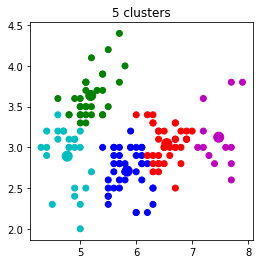

In [ ]:
Xpair = X[:,(0,1)]

def Get2DClusters (Xpair, N):
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (Xpair)
    print (clstrs.cluster_centers_.shape)
    print (clstrs.cluster_centers_)
    aic, bic = computeBIC(clstrs, Xpair)
    print ('BIC = %.3f' %(bic))
    
    myColors = ('red', 'green', 'blue', 'magenta', 'cyan', 'k', '0.2', '0.4')
    if N > 8:
        return clstrs
    
    myClCols = np.empty(Xpair.shape[0], 'str')
    for ii in np.arange (0, len(clstrs.labels_)):
        color_index = clstrs.labels_[ii]
        myClCols[ii] = myColors[color_index]

    plt.figure(figsize = (4, 4))
    plt.scatter (Xpair[:,0], Xpair[:,1], c = myClCols)

    myCntrCol = np.empty(N, 'str')
    for ii in np.arange (0, N):
        color_index = ii
        myCntrCol[ii] = myColors[color_index]

    print (myCntrCol)
    plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], c = myCntrCol, s = 100)
    plt.title (str(N) + " clusters")
    plt.show()
    return clstrs

##  Compute the "right" number of clusters:

for nn in range (1, 6):
    myClstrs = Get2DClusters(Xpair, N = nn)


$k = 3$ gives an adequate good split, and we know from the $BIC$ analysis of features that it is the optimal cluster number. Note that for 2D clustering, BIC fails to call 3 as the optimal cluster number.  It may be an indication of:

    Independence of the 2 chosen features
    Within-cluster joint probability distribution of the 2 features being too wide.
    
Further analysis is needed, including BIC analysis with all 4 features.

Other methods may work better than the BIC.  
For example, percentage of variance explained by the clustering (similar to R-Squared) as a function of number of clusters is often used in cluster analysis.

### Conclusions:

We have demonstrated the use of KMeans in clustering multi-dimensional data.  The same principles will apply to any number of dimensions.  Note that the complexity of K-means algorithm is $O(K * n)$ ($n$ is number of observations in the data set)

The Euclidean distance - which is what KMeans is designed for - ensures that clustering works the way it does.  KMeans is the simplest clustering method, yet very often it is sufficient.  Like with vector clustering, care must be taken to ensure that we are not overfitting (not splitting the data into more clusters than we really need.

Note that the obvious "DMZ" band between the data points is practically ignored by KMeans at $k = 2$, placing one centroid  right into it.  It is something to be aware of.  SVM would have been more useful in this case.

We discussed some ways to improve clustering reproducibility and to figure out the optimal cluster count.

We also mentioned the model-based clustering and outlined in general how it works.

Yet another clustering method is *** Density-based scanning*** (***DBSCAN***). You can find its description here:  https://en.wikipedia.org/wiki/DBSCAN.  Its python implementation is here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html and here: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

## K-Means Clustering - Implementation


In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.naive_bayes import BernoulliNB
import math
import random

In [ ]:
# Load the data, which is included in sklearn.
iris = load_iris()
print ('Iris target names:', iris.target_names)
print ('Iris feature names:', iris.feature_names)
X, Y = iris.data, iris.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:100], Y[:100]
test_data, test_labels = X[100:], Y[100:]

Iris target names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




The iris feature values are real valued -- measurements in centimeters. Let's look at histograms of each feature.

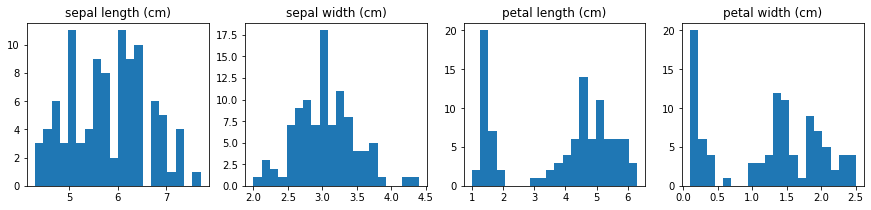

In [ ]:
# Create a new figure and set the figsize argument so we get square-ish plots of the 4 features.
plt.figure(figsize=(15, 3))

# Iterate over the features, creating a subplot with a histogram for each one.
for feature in range(train_data.shape[1]):
    plt.subplot(1, 4, feature+1)
    plt.hist(train_data[:,feature], 20)
    plt.title(iris.feature_names[feature])

Recall that Naive Bayes assumes conditional independence of features. With $Y$ the set of labels and $X$ the set of features ($y$ is a specific label and $x$ is a specific feature), Naive Bayes gives the probability of a label $y$ given input features $X$ as:

$ \displaystyle P(y|X) \approx 
  \frac { P(y) \prod_{x \in X} P(x|y) }
        { \sum_{y \in Y} P(y) \prod_{x \in X} P(x|y) }
$

Let's estimate some of these probabilities using maximum likelihood, which is just a matter of counting and normalizing. We'll start with the prior probability of the label $P(y)$.

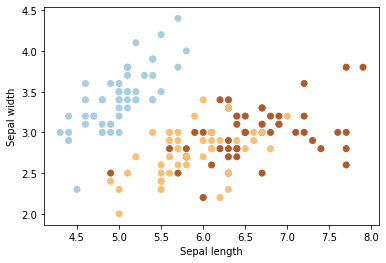

In [ ]:
def visualizeIris(classes):
    plt.scatter(X[:, 0], X[:, 1], c=classes, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()
    
visualizeIris(Y)

In [ ]:
# Verbose implementation of K-means to practice with

# (5) how can we choose this? 
# (6) how can we evaluate this?
def k():
    return 3  

# how else could this be done?
def createRandomExample():
    new = []
    for feature in range(train_data.shape[1]):
        new.append(random.uniform(min(train_data[:,feature]), max(train_data[:,feature])))
    return new  
    
def initCentroids(k):
    centroids=[]
    for i in range(0,k):
          centroids.append(createRandomExample())
    return centroids
            
def updateCentroids(centroids):
    if len(centroids) == 0:
        return initCentroids(k)
    else:
    # (1) fill in
        return []
    
def assignClusters(centroids):
    # (2) fill in
    return 1
    
def cost(centroids):
    # (3) fill in
    return 1
    
def distance(p1, p2):  
    sqdist = 0.
    for i in range(0,3):
        sqdist += (p1[i] - p2[i]) ** 2
    return sqdist ** .5 

k = k()
centroids = []
classes = []
for i in range(1,50): # (7) how else could we chose to stop?
    centroids = updateCentroids(centroids)
    classes = assignClusters(centroids) 
    # (4) uncomment 
    #print i, cost(centroids)
    #visualizeIris(classes)

## Gaussian Mixture Models
http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html

This notebook is an opportunity to try out GMMs.

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 

The mean(s) estimated with this 2 component GMM: 
 [[-0.22526584  0.06521716]
 [ 2.50378346  4.95329646]]


The covariances [SEE THE DOCS] estimated with this 2 component GMM: 
 [[[11.02358503 -0.68658692]
  [-0.68658692  1.02399004]]

 [[ 8.88712779  1.41206899]
  [ 1.41206899  1.84015109]]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Mysterious Rabbit Data')

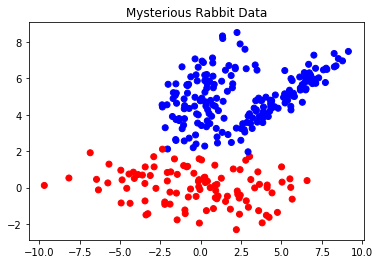

In [ ]:
# data generation
np.random.seed(1)

covar = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

dat_threedee = np.vstack((np.random.multivariate_normal([1, 1, 1], covar, 250), 
                          np.random.multivariate_normal([1, 5, 1], covar, 250),
                          np.random.multivariate_normal([3, 2, 1], covar, 250)))

dat_twodee = np.vstack((np.random.multivariate_normal([0, 0], [[10, 0], [0, 1]], 100),
                        np.random.multivariate_normal([0, 5], [[1, 2], [2, 1]], 100),
                        np.random.multivariate_normal([5, 5], [[5, 3], [3, 2]], 100)))

dat_twodee_simple = np.vstack((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100),
                               np.random.multivariate_normal([0, 5], [[1, 0], [0, 1]], 100),
                               np.random.multivariate_normal([5, 5], [[2, 0], [0, 2]], 100)))

dat_twodee_headache = np.vstack((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100),
                                 np.random.multivariate_normal([0, 1], [[1, 0], [0, 1]], 100),
                                 np.random.multivariate_normal([1, 1], [[2, 0], [0, 2]], 100)))

comps = 2
gm_mod = GaussianMixture(n_components = comps)

gm_mod.fit(dat_twodee)
y_hat = gm_mod.predict(dat_twodee)

print ("The mean(s) estimated with this", comps, "component GMM: \n", gm_mod.means_)

print ("\n\nThe covariances [SEE THE DOCS] estimated with this", comps, "component GMM: \n", gm_mod.covariances_ )

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
p = plt.subplot(1, 1, 1)
p.scatter(dat_twodee[:, 0], dat_twodee[:, 1], c=y_hat, cmap=cm_bright)
plt.title("Mysterious Rabbit Data")

### GMM vs Kmeans vs Agglomerative Clustering

The goal of this question is to directly compare GMMs to other clustering techniques, and get an intuitive sense of the differences.

Links to docs for kmeans and agglomerative clustering:
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

1. Compare the results you see with GMM, KMeans, and AgglomerativeClustering (use all the three linkage types). Some demos are provided below. Try different numbers of clusters for all these algorithms. What differences do you see between the methods? Which one would you recommend using? Don't worry about trying to numerically score the models here, just use plots and your visual judgement.

2. Try this again with the data: dat_twodee_simple and dat_twodee_headache; do you see any differences?

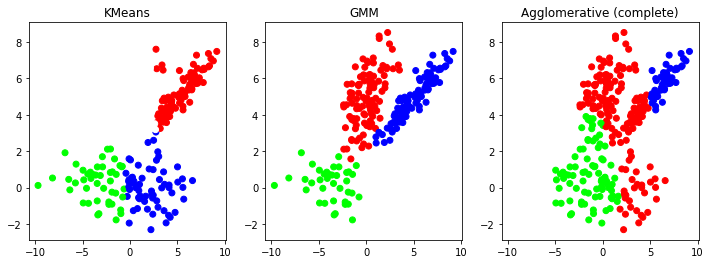

In [ ]:
def proc(dat):
    km = KMeans(n_clusters=4)
    km.fit(dat)

    gm_mod = GaussianMixture(n_components = 4)
    gm_mod.fit(dat)

    ag = AgglomerativeClustering(n_clusters = 4, linkage = "complete")

    cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFFFF'])

    plt.figure(figsize=(12, 4))

    p = plt.subplot(1, 3, 1)
    p.scatter(dat[:, 0], dat[:, 1], c=km.predict(dat), cmap=cm_bright)
    plt.title('KMeans') 

    p = plt.subplot(1, 3, 2)
    p.scatter(dat[:, 0], dat[:, 1], c=gm_mod.predict(dat), cmap=cm_bright)
    plt.title('GMM') 

    p = plt.subplot(1, 3, 3)
    p.scatter(dat[:, 0], dat[:, 1], c=ag.fit_predict(dat), cmap=cm_bright)
    plt.title('Agglomerative (complete)') 
    
proc(dat_twodee)

## Gaussian mixture models (GMM) vs K-means
https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas

from sklearn.datasets.samples_generator import make_blobs
from matplotlib.patches import Ellipse


from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering



### Make the data

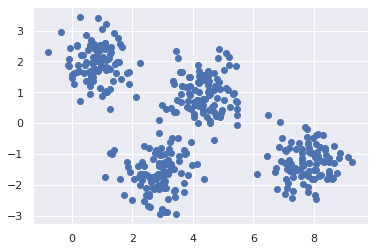

In [ ]:
# Generate some data
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

plt.scatter(X[:, 0], X[:, 1])

### K-means with circular clusters

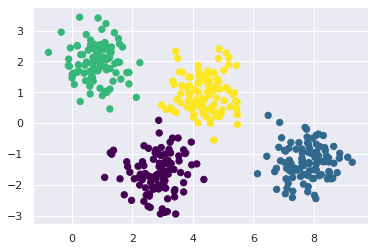

In [ ]:
# Plot the data with K Means Labels

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:


def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

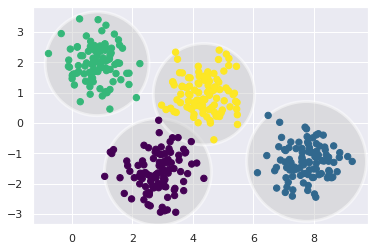

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

### K-means with non-circular clusters

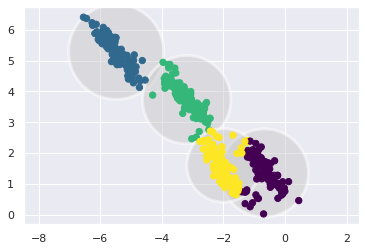

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

### GMM with circular clusters

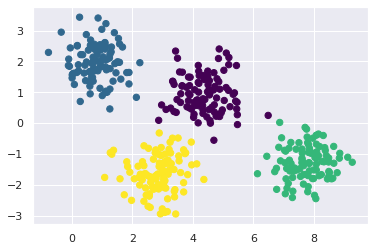

In [ ]:
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.531 0.    0.469 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4615ba0198>]],
      dtype=object)

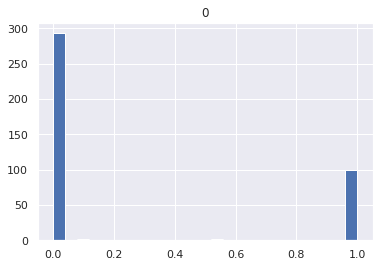

In [ ]:
pandas.DataFrame(probs[:,0] ).hist(bins=25)

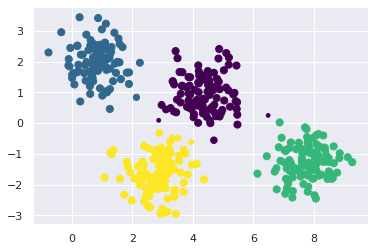

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

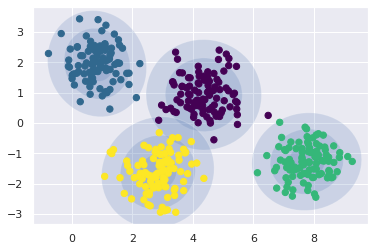

In [ ]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

### GMM with non-circular clusters

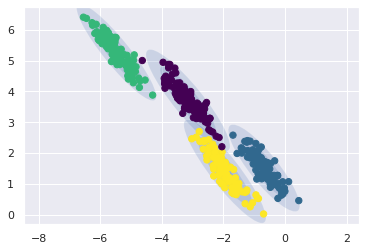

In [ ]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

### More fun clusters -- Moons

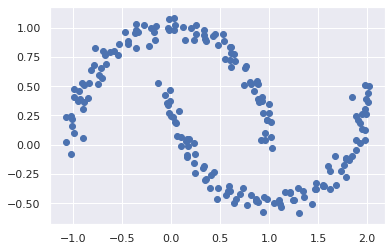

In [ ]:
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

#### K-means

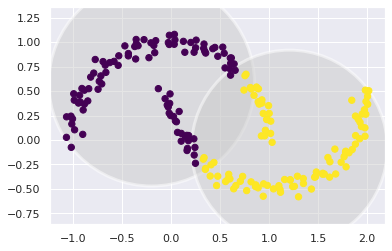

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, Xmoon)

#### 2 Clusters

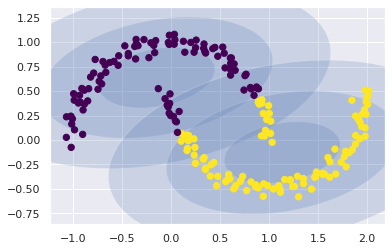

In [ ]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

#### 4 Clusters

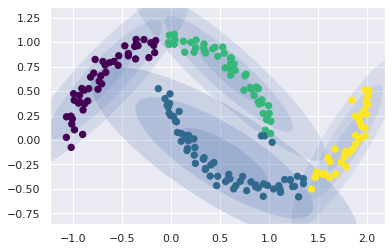

In [ ]:
gmm4 = GMM(n_components=4, covariance_type='full', random_state=0)
plot_gmm(gmm4, Xmoon, label=True)

#### 16 Clusters

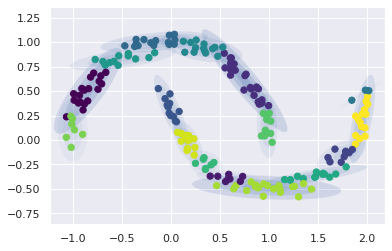

In [ ]:
gmm16= GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=True)

### Extension - GMM is a generative model

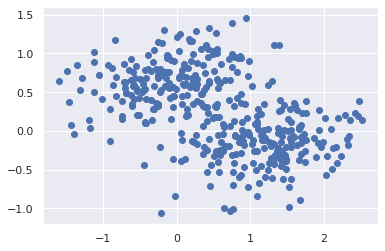

In [ ]:
# using gmm 2
Xnew = gmm2.sample(400)
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

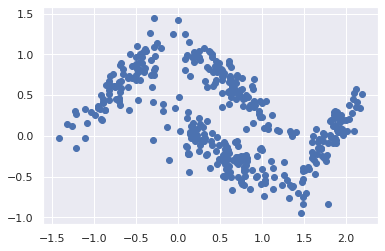

In [ ]:
## using gmm 4
Xnew = gmm4.sample(400)
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

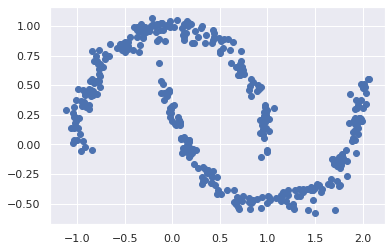

In [ ]:
## using gmm 16
Xnew = gmm16.sample(400)
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

## Extension - spectral clustering
Essentially k-means w/ nearest neighbors as an input

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.

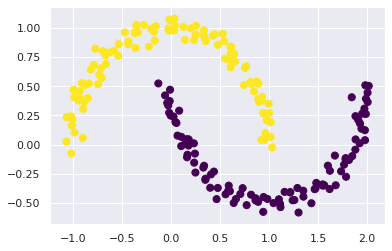

In [ ]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=labels,
            s=50, cmap='viridis');